In [43]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import models
from keras.models import load_model
print(tf.__version__)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, recall_score, classification_report

import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

2.4.1


In [56]:
train = pd.read_csv('MWMOTE_creditcard_samples.csv',sep=',')
train= train.drop('Unnamed: 0',1)
test= pd.read_csv('creditcard_test.csv', sep=',')
test= test.drop('Unnamed: 0',1)
print(len(train))
print(len(test))
print(test.columns)

454902
56962
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [57]:
std_scale=StandardScaler()

numeric_features_test = test.select_dtypes(include=[np.number])
numeric_features_test = numeric_features_test.drop('Class',1)
std_scale.fit(numeric_features_test)
norm_num_test= std_scale.transform(numeric_features_test)
norm_num_test = pd.DataFrame(norm_num_test, index=numeric_features_test.index, columns=numeric_features_test.columns) 
norm_num_test.update(norm_num_test)

label_enc= LabelEncoder()

categoric_features_test = test.select_dtypes(include=['object']).copy()
categoric_cols=(categoric_features_test.columns).tolist()
categoric_features_test[categoric_cols]=categoric_features_test[categoric_cols].apply(lambda col: label_enc.fit_transform(col))
le_cat_test= categoric_features_test[categoric_cols]
#concates these to form features and target class
X_test= pd.concat([norm_num_test, le_cat_test], axis=1)
Y_test= test['Class'].copy()
print(X_test.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


454902
454902
454902
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


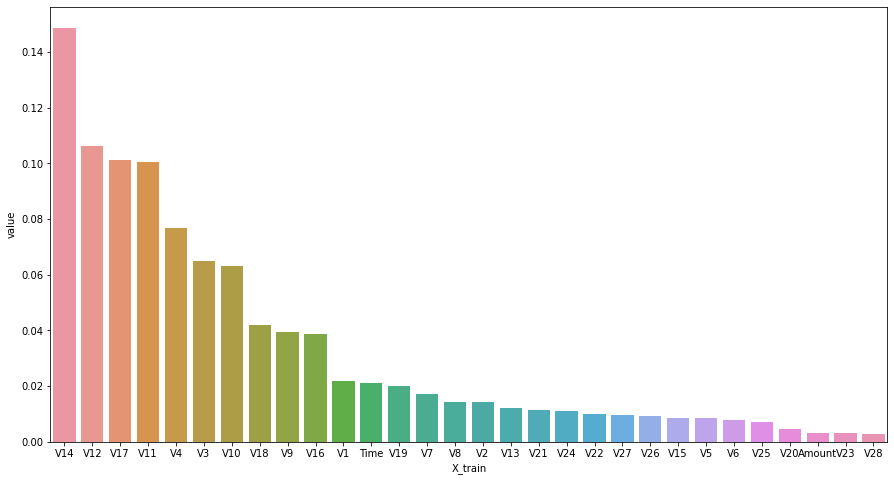

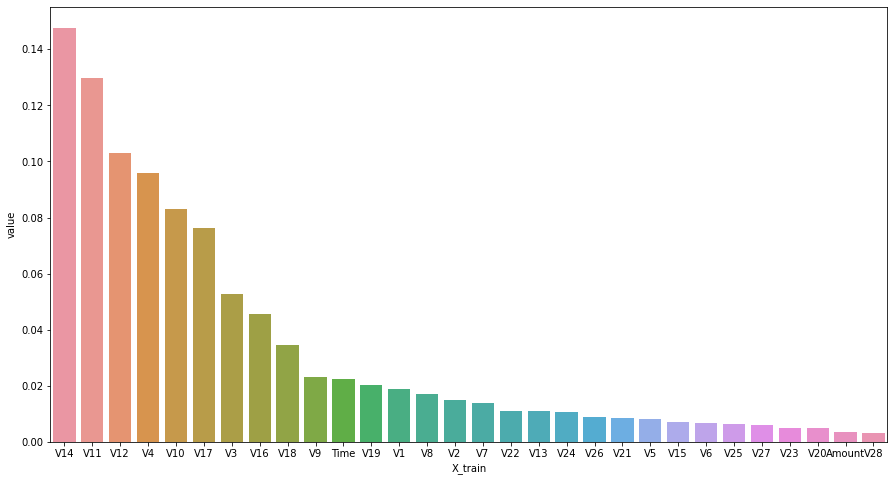

In [58]:
numeric_features_train = train.select_dtypes(include=[np.number])
numeric_features_train = numeric_features_train.drop('Class',1)
std_scale.fit(numeric_features_train)
norm_num_train= std_scale.transform(numeric_features_train)
norm_num_train = pd.DataFrame(norm_num_train, index=numeric_features_train.index, columns=numeric_features_train.columns) 
norm_num_train.update(norm_num_train)
print(len(norm_num_train))

label_enc= LabelEncoder()

categoric_features_train = train.select_dtypes(include=['object']).copy()
print(len(categoric_features_train))
categoric_cols=(categoric_features_train.columns).tolist()
categoric_features_train[categoric_cols]=categoric_features_train[categoric_cols].apply(lambda col: label_enc.fit_transform(col))
le_cat_train= categoric_features_train[categoric_cols]
print(len(le_cat_train))

X_train= pd.concat([norm_num_train, le_cat_train],axis=1)
Y_train = train['Class'].reset_index(drop=True)
Y_train= pd.DataFrame(Y_train)
print(X_test.columns)

#Random Forest and Extra Trees used for feature selection, selects 10 best features through feature importance

modelxgb = ExtraTreesClassifier()
modelxgb.fit(X_train, Y_train)

f_xgb = pd.DataFrame(data={'X_train':X_train.columns,'value':modelxgb.feature_importances_})
f_xgb = f_xgb.sort_values(['value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_xgb['X_train'],f_xgb['value'])

etcmodel = ExtraTreesClassifier()
etcmodel.fit(X_train,Y_train)

f_etc = pd.DataFrame(data={'X_train':X_train.columns,'value':etcmodel.feature_importances_})
f_etc = f_etc.sort_values(['value'],ascending=False )
plt.figure(figsize=(15,8))
sns.barplot(f_etc['X_train'],f_etc['value'])

ft = pd.merge(f_xgb, f_etc,how='inner', on=["X_train"])
ft.sort_values(["value_x","value_y"],ascending=False, inplace=True)
print(X_test.columns)

top10ft = ft.head(10)
#selects top 10 variables
X_train=X_train[top10ft.X_train]
X_test=X_test[top10ft.X_train]


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import classification_report_imbalanced
import re
from io import StringIO 
import numpy as np
import pandas as pd


et= ExtraTreesClassifier()
et.fit(X_train,Y_train)
v_pred= et.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [61]:
csv_link= '.csv'
classifier_name= 'et_'
cm= confusion_matrix(Y_test, v_pred)
cm= pd.DataFrame(cm)
cm_csv= '_cm.csv'

cm_to_csv= classifier_name + cm_csv
cm.to_csv(cm_to_csv)

false_negatives= np.logical_and(Y_test != v_pred, v_pred==0)
false_positives= np.logical_and(Y_test!=v_pred, v_pred== 1)
credit_fraud_data_fp= test[false_positives==True]
credit_fraud_data_fn= test[false_negatives==True]

loss_with_classifier_value= np.sum(credit_fraud_data_fn['Amount'])
print(credit_fraud_data_fn)
loss_with_classifier= pd.DataFrame(['Total loss when using this classifier: ', loss_with_classifier_value])

extract_fraud= test[test['Class']==1]
loss_without_classifier_value=  np.sum(extract_fraud['Amount'])
loss_without_classifier= pd.DataFrame(['Total loss without using this classifier: ', loss_without_classifier_value])

savings_with_classifier_value=loss_without_classifier_value-loss_with_classifier_value
savings_with_classifier= pd.DataFrame(['Money saved when using this classifier: ', savings_with_classifier_value])

financial_loss_general_value= (np.average(credit_fraud_data_fp['Amount'])*len(credit_fraud_data_fp))+(np.average(credit_fraud_data_fn['Amount'])*len(credit_fraud_data_fn))
financial_loss_general = pd.DataFrame(['Financial Loss (avg cost: missed fraud)*(FN) + (avg cost: investigating fraud)*(FP)', financial_loss_general_value])
class_report= classification_report_imbalanced(Y_test,v_pred)
print(class_report)
print(savings_with_classifier_value)
class_report_imb_csv = pd.read_csv(StringIO(re.sub(r'[-+|]', '', class_report)), sep='\s{2,}', engine='python')
report_to_csv= '_class_report_imb.csv'
cri_csv= classifier_name+report_to_csv
class_report_imb_csv.to_csv(cri_csv)

with open(cri_csv,'a') as f:
  loss_with_classifier.to_csv(f, header=False, sep=',')
  loss_without_classifier.to_csv(f, header=False, sep=',')
  savings_with_classifier.to_csv(f, header=False, sep=',')
  financial_loss_general.to_csv(f, header=False, sep=',')

           Time        V1        V2  ...       V28  Amount  Class
10621  129095.0 -1.836940 -1.646764  ...  0.370450  720.80      1
12267   70828.0  0.196707  1.189757  ...  0.257315    0.76      1
14498   86376.0 -0.670238  0.945206  ...  0.282209  323.77      1
19374  152710.0  0.051075  1.310427  ... -0.221816    2.47      1
21449  155548.0  1.878230  1.325630  ...  0.005238    7.06      1
34810   44532.0 -0.234922  0.355413  ...  0.039581    1.00      1
45719  129808.0  1.522080 -0.519429  ...  0.041881  276.17      1

[7 rows x 31 columns]
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.63      0.93      0.78      0.77      0.57     56864
          1       0.00      0.93      0.63      0.01      0.77      0.61        98

avg / total       1.00      0.63      0.93      0.77      0.77      0.57     56962

7580.550000000002
